# Campus Recruitment

Dataset ชุดนี้เป็นข้อมูลการจ้างงานของสถาบันการศึกษาแห่งหนึ่ง ซี่งมีข้อมูลการศึกษาของผู้สมัคร ความเชี่ยวชาญ ประสบการณ์การทำงาน ผลการสอบเข้าทำงาน และผลการรับเข้าทำงาน (status)

## Data Description

| Variables | Definition |
| --------- | ---------- |
| sl_no | Serial Number |
| gender | Gender- Male='M',Female='F' |
| ssc_p | Secondary Education percentage- 10th Grade |
| ssc_b | Board of Education (Secondary Education)- Central/ Others |
| hsc_p | Higher Secondary Education percentage- 12th Grade |
| hsc_b | Board of Education (Higher Secondary Education)- Central/ Others |
| hsc_s | Specialization in Higher Secondary Education |
| degree_p | Degree Percentage |
| degree_t | Under Graduation(Degree type)- Field of degree education |
| workex | Work Experience |
| etest_p | Employability test percentage (conducted by college) |
| specialisation | Post Graduation(MBA)- Specialization |
| mba_p | MBA percentage |
| status | Status of placement- Placed/Not placed |

## Objective:

- Explore data และ สร้าง classification model เพื่อทำนายผลการรับเข้าทำงาน (status)
- ปัจจัยใดบ้างที่มีผลต่อการรับเข้าทำงาน (3 อันดับแรก)

In [553]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Importing data

In [554]:
df = pd.read_csv('placement.csv')

In [555]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [556]:
df.tail()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,212,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,213,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,214,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed
214,215,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed


In [557]:
df.sample(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
162,163,M,74.20,Central,87.60,Others,Commerce,77.25,Comm&Mgmt,Yes,75.20,Mkt&Fin,66.06,Placed
196,197,M,72.00,Others,63.00,Others,Science,77.50,Sci&Tech,Yes,78.00,Mkt&Fin,54.48,Placed
85,86,F,83.84,Others,89.83,Others,Commerce,77.20,Comm&Mgmt,Yes,78.74,Mkt&Fin,76.18,Placed
118,119,M,76.00,Central,80.00,Central,Science,78.00,Sci&Tech,Yes,97.00,Mkt&HR,70.48,Placed
79,80,F,69.00,Central,62.00,Central,Science,66.00,Sci&Tech,No,75.00,Mkt&HR,67.99,Not Placed


In [558]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000


In [559]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 23.6+ KB


## แยกชื่อ columns ที่เป็น categorical กับ numerical เก็บไว้ใน array

In [560]:
num_cols = []
cat_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        cat_cols.append(col)
    else:
        num_cols.append(col)

In [561]:
m_p = len(df[ (df['gender']=='M') & (df['status']=='Placed') ])
m_n = len(df[ (df['gender']=='M') & (df['status']=='Not Placed') ])
f_p = len(df[ (df['gender']=='F') & (df['status']=='Placed') ])
f_n = len(df[ (df['gender']=='F') & (df['status']=='Not Placed') ])

print(f'อัตราการรับผู้ชายเข้า ต่อผู้ชายที่สมัครมาทั้งหมด = {m_p/(m_p + m_n)}')
print(f'อัตราการรับผู้หญิงเข้า ต่อผู้หญิงที่สมัครมาทั้งหมด = {f_p/(f_p + f_n)}')

อัตราการรับผู้ชายเข้า ต่อผู้ชายที่สมัครมาทั้งหมด = 0.7194244604316546
อัตราการรับผู้หญิงเข้า ต่อผู้หญิงที่สมัครมาทั้งหมด = 0.631578947368421


## pairplot ข้อมูลที่เป็น numerical ยกเว้น 'sl_no' ที่เป็น identifier

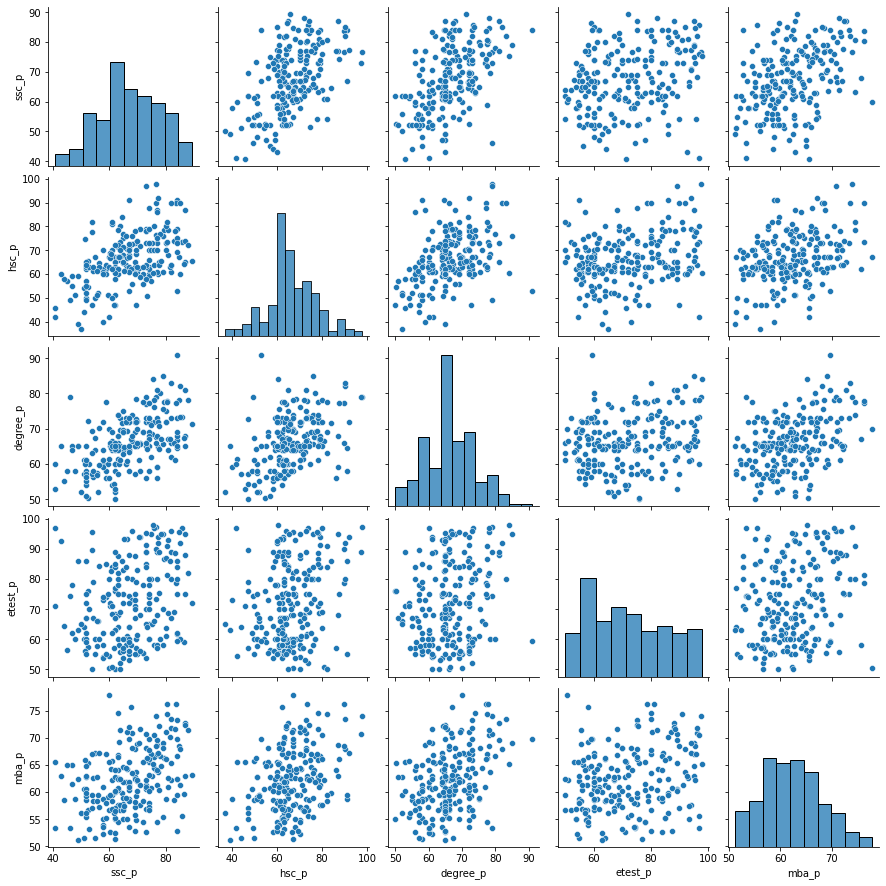

In [562]:
sns.pairplot(df[num_cols[1:]])

## plot ดู distribution ของ categorical data

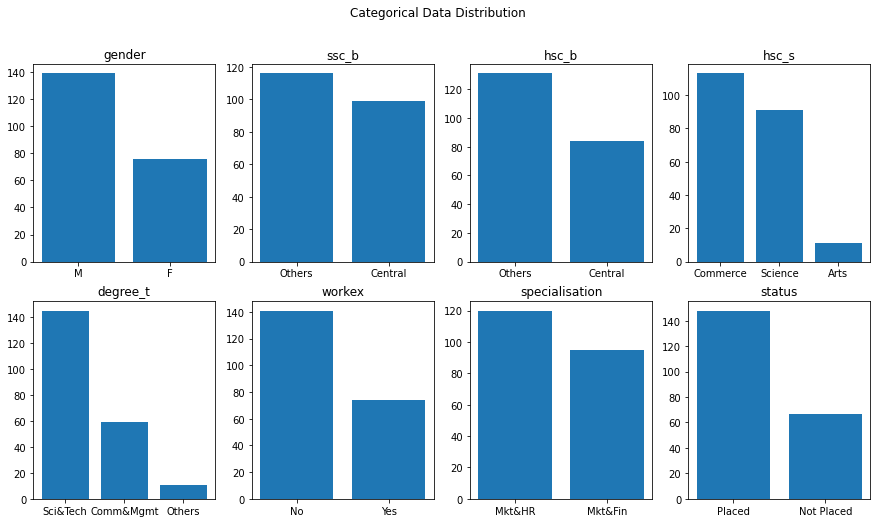

In [563]:
fig_cat, ax_cat = plt.subplots(2, 4, figsize=(15, 8))
fig_cat.suptitle('Categorical Data Distribution')

i = 0
for ax_r in ax_cat:
    for ax in ax_r:
        ax.set_title(cat_cols[i])
        ax.bar(df[cat_cols[i]].unique(), df[cat_cols[i]].value_counts())
        i += 1

## ดู Missing Values

In [564]:
null_values = df.isnull().sum()
null_values

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

# Preprocessing data
## Categorical data
## One-hot encoding

In [565]:
one_hot = {}
one_hot_df = df.copy()
for col in cat_cols:
    one_hot[col] = pd.get_dummies(df[col], prefix=col)
    one_hot_df = one_hot_df.drop(col,axis=1)

for h in one_hot.values() : 
    one_hot_df = pd.concat([one_hot_df, h], axis = 1)
one_hot_df

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,ssc_b_Central,ssc_b_Others,...,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
0,1,67.00,91.00,58.00,55.0,58.80,0,1,0,1,...,0,0,0,1,1,0,0,1,0,1
1,2,79.33,78.33,77.48,86.5,66.28,0,1,1,0,...,1,0,0,1,0,1,1,0,0,1
2,3,65.00,68.00,64.00,75.0,57.80,0,1,1,0,...,0,1,0,0,1,0,1,0,0,1
3,4,56.00,52.00,52.00,66.0,59.43,0,1,1,0,...,1,0,0,1,1,0,0,1,1,0
4,5,85.80,73.60,73.30,96.8,55.50,0,1,1,0,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,80.60,82.00,77.60,91.0,74.49,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1
211,212,58.00,60.00,72.00,74.0,53.62,0,1,0,1,...,1,0,0,1,1,0,1,0,0,1
212,213,67.00,67.00,73.00,59.0,69.72,0,1,0,1,...,0,1,0,0,0,1,1,0,0,1
213,214,74.00,66.00,58.00,70.0,60.23,1,0,0,1,...,0,1,0,0,1,0,0,1,0,1


## drop columns categorical ที่มี 2 ประเภท

In [566]:
one_hot_df = one_hot_df.drop(['gender_F', 'ssc_b_Others', 'hsc_b_Others', 'workex_No', 'specialisation_Mkt&Fin', 'status_Not Placed'], axis=1)
one_hot_df

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,ssc_b_Central,hsc_b_Central,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
0,1,67.00,91.00,58.00,55.0,58.80,1,0,0,0,1,0,0,0,1,0,1,1
1,2,79.33,78.33,77.48,86.5,66.28,1,1,0,0,0,1,0,0,1,1,0,1
2,3,65.00,68.00,64.00,75.0,57.80,1,1,1,1,0,0,1,0,0,0,0,1
3,4,56.00,52.00,52.00,66.0,59.43,1,1,1,0,0,1,0,0,1,0,1,0
4,5,85.80,73.60,73.30,96.8,55.50,1,1,1,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,80.60,82.00,77.60,91.0,74.49,1,0,0,0,1,0,1,0,0,0,0,1
211,212,58.00,60.00,72.00,74.0,53.62,1,0,0,0,0,1,0,0,1,0,0,1
212,213,67.00,67.00,73.00,59.0,69.72,1,0,0,0,1,0,1,0,0,1,0,1
213,214,74.00,66.00,58.00,70.0,60.23,0,0,0,0,1,0,1,0,0,0,1,1


## Numerical data

## Plot ดู numerical data ก่อน scaling

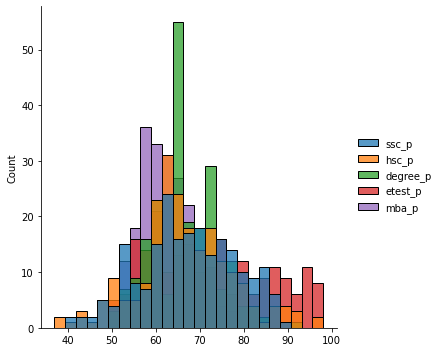

In [567]:
sns.displot(df[df.columns[1:]])

## ลักษณะดู เป็น guassian's normal distribution จึงใช้ StandardScaler

In [568]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[num_cols[1:]])
scaled_num_df = pd.DataFrame(scaler.transform(df[num_cols[1:]]), columns=num_cols[1:])
scaled_num_df

,ssc_p,hsc_p,degree_p,etest_p,mba_p
0,-0.028087,2.268812,-1.140102,-1.291091,-0.597647
1,1.113369,1.103448,1.513267,1.087157,0.687620
2,-0.213238,0.153313,-0.322843,0.218908,-0.769474
3,-1.046417,-1.318339,-1.957362,-0.460592,-0.489396
4,1.712332,0.668391,0.943909,1.864806,-1.164676
...,...,...,...,...,...
210,1.230940,1.441008,1.529612,1.426906,2.098321
211,-0.861266,-0.582513,0.766836,0.143408,-1.487711
212,-0.028087,0.061335,0.903046,-0.989091,1.278706
213,0.619941,-0.030644,-1.140102,-0.158592,-0.351934


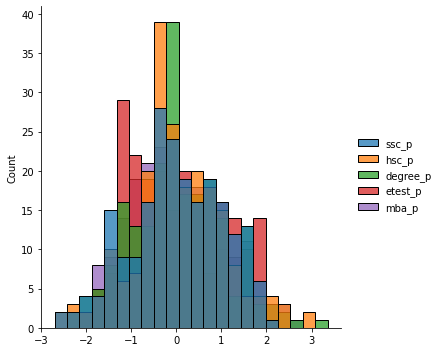

In [569]:
sns.displot(scaled_num_df)

## นำ numerical ที่ scaled มารวมกับ categorical ที่ encoded

In [570]:
preprocessed_df = one_hot_df.copy()
preprocessed_df[num_cols[1:]] = scaled_num_df
preprocessed_df

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,ssc_b_Central,hsc_b_Central,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
0,1,-0.028087,2.268812,-1.140102,-1.291091,-0.597647,1,0,0,0,1,0,0,0,1,0,1,1
1,2,1.113369,1.103448,1.513267,1.087157,0.687620,1,1,0,0,0,1,0,0,1,1,0,1
2,3,-0.213238,0.153313,-0.322843,0.218908,-0.769474,1,1,1,1,0,0,1,0,0,0,0,1
3,4,-1.046417,-1.318339,-1.957362,-0.460592,-0.489396,1,1,1,0,0,1,0,0,1,0,1,0
4,5,1.712332,0.668391,0.943909,1.864806,-1.164676,1,1,1,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1.230940,1.441008,1.529612,1.426906,2.098321,1,0,0,0,1,0,1,0,0,0,0,1
211,212,-0.861266,-0.582513,0.766836,0.143408,-1.487711,1,0,0,0,0,1,0,0,1,0,0,1
212,213,-0.028087,0.061335,0.903046,-0.989091,1.278706,1,0,0,0,1,0,1,0,0,1,0,1
213,214,0.619941,-0.030644,-1.140102,-0.158592,-0.351934,0,0,0,0,1,0,1,0,0,0,1,1


## drop 'sl_no' ทิ้ง เพราะไม่มีประโยชน์ ต่อการทำนาย

In [571]:
preprocessed_df.drop(['sl_no'], axis=1, inplace=True)
preprocessed_df

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,ssc_b_Central,hsc_b_Central,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
0,-0.028087,2.268812,-1.140102,-1.291091,-0.597647,1,0,0,0,1,0,0,0,1,0,1,1
1,1.113369,1.103448,1.513267,1.087157,0.687620,1,1,0,0,0,1,0,0,1,1,0,1
2,-0.213238,0.153313,-0.322843,0.218908,-0.769474,1,1,1,1,0,0,1,0,0,0,0,1
3,-1.046417,-1.318339,-1.957362,-0.460592,-0.489396,1,1,1,0,0,1,0,0,1,0,1,0
4,1.712332,0.668391,0.943909,1.864806,-1.164676,1,1,1,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1.230940,1.441008,1.529612,1.426906,2.098321,1,0,0,0,1,0,1,0,0,0,0,1
211,-0.861266,-0.582513,0.766836,0.143408,-1.487711,1,0,0,0,0,1,0,0,1,0,0,1
212,-0.028087,0.061335,0.903046,-0.989091,1.278706,1,0,0,0,1,0,1,0,0,1,0,1
213,0.619941,-0.030644,-1.140102,-0.158592,-0.351934,0,0,0,0,1,0,1,0,0,0,1,1


<AxesSubplot:>

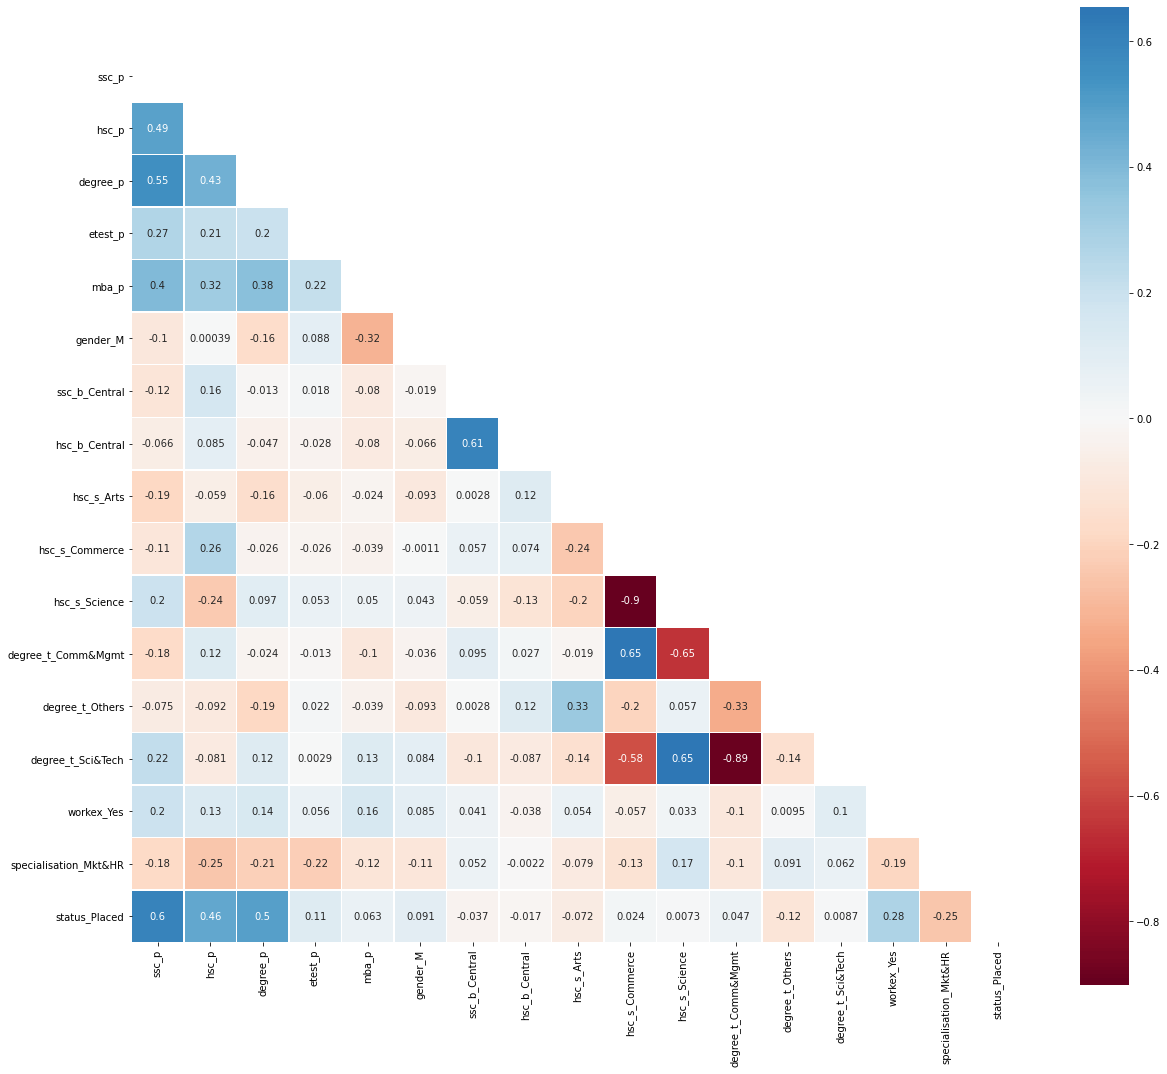

In [572]:
corr = preprocessed_df.corr(method='spearman')

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 18))

sns.heatmap(corr, annot = True, mask=mask, cmap="RdBu", center=0,
            square=True, linewidths=.5)

<AxesSubplot:>

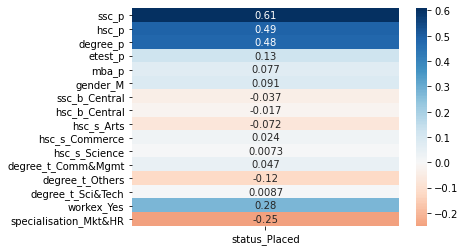

In [573]:
corrMatrix = preprocessed_df.corr()
corrMatrix = pd.DataFrame(corrMatrix['status_Placed'][:-1])

sns.heatmap(corrMatrix, annot = True, cmap="RdBu", center=0)

ดูจาก correlation -> ssc_p, degree_p, hsc_p มี corelation ต่อการรับเข้าทำงาน มากที่สุดตามลำดับ

## แยก features และ label ออกจากกัน

In [574]:
X = preprocessed_df.drop('status_Placed', axis=1)
y = preprocessed_df['status_Placed']

In [575]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## check ว่า stratify หรือไม่

In [576]:
print('(X_train Male / Male+Female) , (X_test Male / Male+Female)')
X_train[X_train['gender_M'] == 1]['gender_M'].count() / X_train['gender_M'].count(), X_test[X_test['gender_M'] == 1]['gender_M'].count() / X_test['gender_M'].count()

(X_train Male / Male+Female) , (X_test Male / Male+Female)


(0.68, 0.5692307692307692)

# models selection

In [577]:
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import plot_roc_curve, accuracy_score, plot_confusion_matrix, f1_score

In [578]:
def cross_val(es, cv=5):
    es_cv = cross_val_score(es, X, y, cv=cv)
    for i in range(len(es_cv)):
        print('Fold %s : %s' %(i, es_cv[i]))
    print("Mean cross val score ", np.mean(es_cv))
def roc(es):
    plot_roc_curve(es, X_test, y_test)
    plt.grid()
def train_test_score(es):
    print(f'train set\'s score {es.score(X_train, y_train)}')
    print(f'test set\'s score {es.score(X_test, y_test)}')
def confusion_matrix(es):
    plot_confusion_matrix(es, X_test, y_test, cmap='Blues', values_format='d')

## Logistic Regression

In [579]:
param_grid_lr = {
    "C" : np.logspace(-3,3,7), # 0.001, 0.01, 0.1, 1, 10, 100, 1000 | C is Inverse of regularization strength
}

In [580]:
gs_lr = GridSearchCV(LogisticRegression(), param_grid=param_grid_lr, scoring='accuracy', return_train_score=True, cv=5)
gs_lr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             return_train_score=True, scoring='accuracy')

In [581]:
gs_lr.best_params_

{'C': 1.0}

In [582]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [583]:
train_test_score(lr)

train set's score 0.9266666666666666
test set's score 0.8615384615384616


In [584]:
cross_val(lr)

Fold 0 : 0.8604651162790697
Fold 1 : 0.7906976744186046
Fold 2 : 0.9069767441860465
Fold 3 : 0.8372093023255814
Fold 4 : 0.8837209302325582
Mean cross val score  0.855813953488372


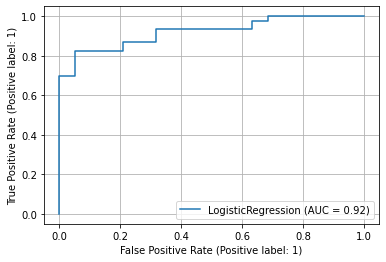

In [585]:
roc(lr)

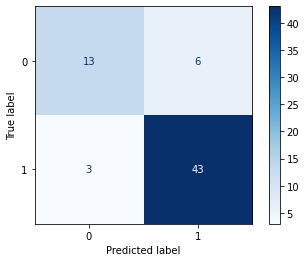

In [586]:
confusion_matrix(lr)

## Decision Tree

In [587]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.linspace(1, 10, 10, dtype=int)
}

In [588]:
gs_dt = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid_dt, scoring='accuracy', return_train_score=True, cv=5)
gs_dt.fit(X_train, y_train)
gs_dt.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [589]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [590]:
train_test_score(dt)

train set's score 0.8866666666666667
test set's score 0.7538461538461538


In [591]:
cross_val(dt)

Fold 0 : 0.8372093023255814
Fold 1 : 0.7906976744186046
Fold 2 : 0.8604651162790697
Fold 3 : 0.813953488372093
Fold 4 : 0.6976744186046512
Mean cross val score  0.8


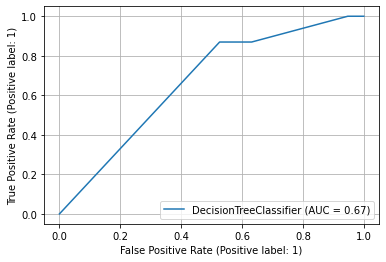

In [592]:
roc(dt)

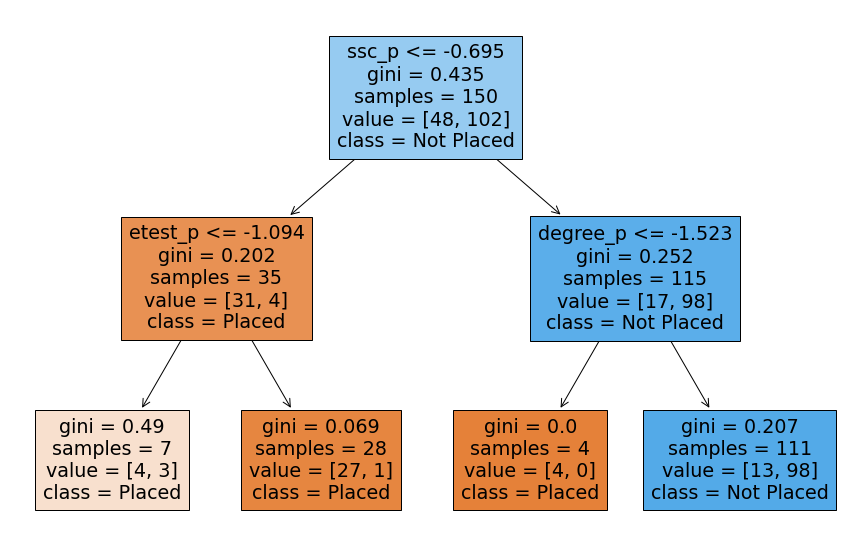

In [593]:
fig = plt.figure(figsize=(15,10))
_ = plot_tree(dt, 
        feature_names=X.columns,  
        class_names=['Placed', 'Not Placed'],
        filled=True)

In [594]:
dt_new = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt_new.fit(X_train, y_train)
train_test_score(dt_new)

train set's score 0.9066666666666666
test set's score 0.7846153846153846


In [595]:
cross_val(dt_new)

Fold 0 : 0.9069767441860465
Fold 1 : 0.813953488372093
Fold 2 : 0.8372093023255814
Fold 3 : 0.813953488372093
Fold 4 : 0.7209302325581395
Mean cross val score  0.8186046511627907


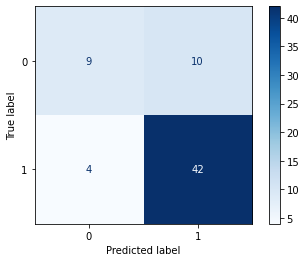

In [596]:
confusion_matrix(dt_new)

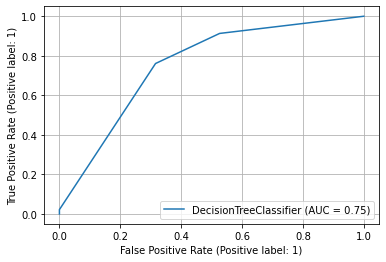

In [597]:
roc(dt_new)

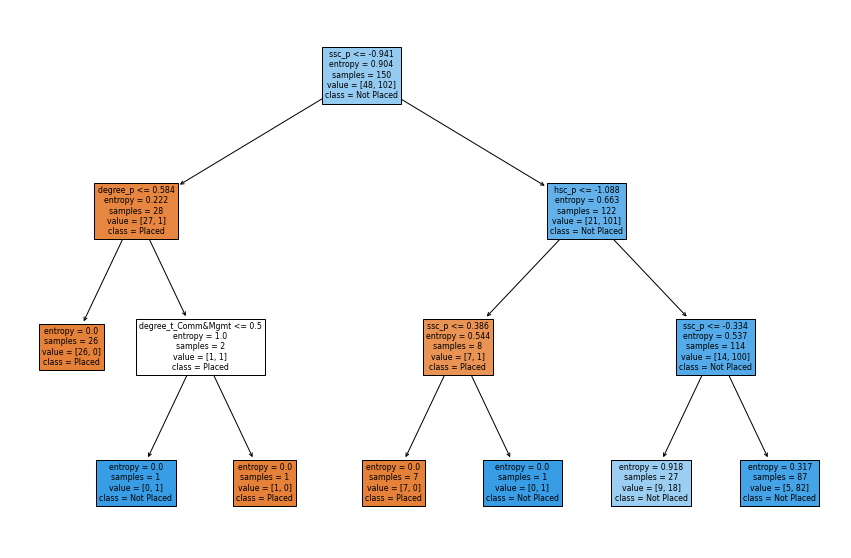

In [598]:
fig = plt.figure(figsize=(15,10))
_ = plot_tree(dt_new, 
        feature_names=X.columns,  
        class_names=['Placed', 'Not Placed'],
        filled=True)

## K Nearest Neighbors

In [599]:
param_grid_knn = {
    'n_neighbors': np.linspace(1, 20, 20, dtype=int),
    'metric': ['euclidean', 'manhattan']
}

In [600]:
gs_knn = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_knn, scoring='accuracy', return_train_score=True, cv=5)
gs_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             return_train_score=True, scoring='accuracy')

In [601]:
gs_knn.best_params_

{'metric': 'euclidean', 'n_neighbors': 11}

In [602]:
knn = KNeighborsClassifier(metric='euclidean', n_neighbors=11)
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [603]:
train_test_score(knn)

train set's score 0.86
test set's score 0.8


In [604]:
cross_val(knn)

Fold 0 : 0.8372093023255814
Fold 1 : 0.7906976744186046
Fold 2 : 0.8837209302325582
Fold 3 : 0.8604651162790697
Fold 4 : 0.7906976744186046
Mean cross val score  0.8325581395348836


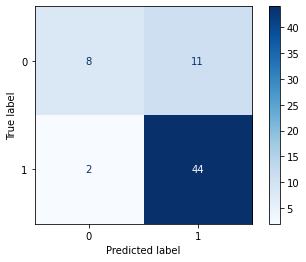

In [605]:
confusion_matrix(knn)

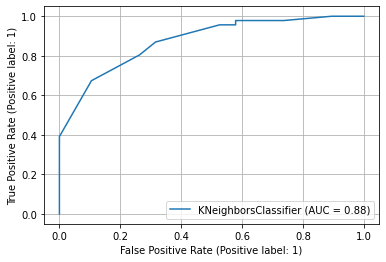

In [606]:
roc(knn)

## Support Vector Machine

In [607]:
param_grid_svm = [
    {
        'C': np.logspace(-1, 3, 5),
        'kernel': ['linear']
    },
    {
        'C': np.logspace(-1, 3, 5),
        'gamma': np.logspace(-4, 0, 5),
        'kernel': ['rbf']
    }
    ]

In [608]:
gs_svm = GridSearchCV(SVC(), param_grid=param_grid_svm, scoring='accuracy', return_train_score=True, cv=5)
gs_svm.fit(X_train, y_train)
gs_svm.best_params_

{'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'}

In [609]:
svc = SVC(kernel='linear', C=1)
svc.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [610]:
train_test_score(svc)

train set's score 0.9266666666666666
test set's score 0.8615384615384616


In [611]:
cross_val(svc)

Fold 0 : 0.8837209302325582
Fold 1 : 0.813953488372093
Fold 2 : 0.9302325581395349
Fold 3 : 0.8604651162790697
Fold 4 : 0.8837209302325582
Mean cross val score  0.8744186046511627


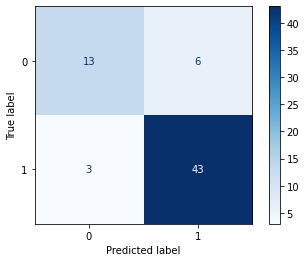

In [612]:
confusion_matrix(svc)

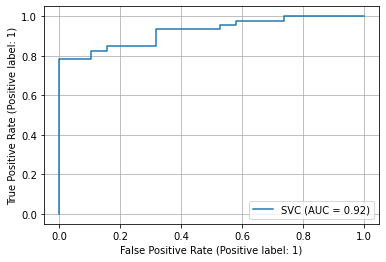

In [613]:
roc(svc)

## Weighted Ensemble

In [614]:
lr_y_pred = lr.predict(X_test)
dt_new_y_pred = dt_new.predict(X_test)
svc_y_pred = svc.predict(X_test)
knn_y_pred = knn.predict(X_test)

In [615]:
voting_df = pd.DataFrame({'lr':lr_y_pred, 
                          'dt_new':dt_new_y_pred, 'svc':svc_y_pred, 
                          'knn':knn_y_pred})

In [616]:
voting_df.head()

,lr,dt_new,svc,knn
0,0,1,0,1
1,1,1,1,1
2,1,1,1,1
3,0,0,0,0
4,1,1,1,1


In [617]:
weight = pd.DataFrame({'lr': [0.8615384615384616], 'dt_new': [0.7846153846153846], 'svc': [0.8615384615384616], 'knn': [0.8]})

In [618]:
half_weight_sum = weight.sum(axis=1)
half_weight_sum /= 2
half_weight_sum

0    1.653846
dtype: float64

In [619]:
voting_df = voting_df.apply(lambda x: x * weight.iloc[0], axis=1)
voting_df

,lr,dt_new,svc,knn
0,0.000000,0.784615,0.000000,0.8
1,0.861538,0.784615,0.861538,0.8
2,0.861538,0.784615,0.861538,0.8
3,0.000000,0.000000,0.000000,0.0
4,0.861538,0.784615,0.861538,0.8
...,...,...,...,...
60,0.861538,0.784615,0.861538,0.8
61,0.861538,0.784615,0.861538,0.8
62,0.861538,0.784615,0.861538,0.8
63,0.861538,0.784615,0.861538,0.8


In [620]:
voting_df = voting_df.sum(axis=1)

In [621]:
result = voting_df.apply(lambda x: 1 if (x >= half_weight_sum)[0] else 0)

In [622]:
result.head()

0    0
1    1
2    1
3    0
4    1
dtype: int64

In [623]:
accuracy_score(y_test, result)

0.8615384615384616

In [624]:
lr.coef_

array([[ 2.13552071,  1.00286697,  0.97190996, -0.50579039, -0.96252509,
         0.71717904, -0.17414095, -0.07103248,  0.41852671, -0.48125623,
         0.0627601 ,  0.49585314,  0.03456275, -0.5303853 ,  1.23528772,
        -0.18944129]])

In [625]:
preprocessed_df.head(1)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,ssc_b_Central,hsc_b_Central,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
0,-0.028087,2.268812,-1.140102,-1.291091,-0.597647,1,0,0,0,1,0,0,0,1,0,1,1


## ปัจจัยใดบ้างที่มีผลต่อการรับเข้าทำงาน (3 อันดับแรก)
ดูจาก) correlation matrix -> **ssc_p, degree_p, hsc_p** มีผลต่อการรับเข้าทำงาน มากที่สุดตามลำดับ

ดูจาก) node ใน decision tree (entropy) -> **ssc_p, degree_p, hsc_p, etest_p** มีผลต่อการรับเข้าทำงาน มากที่สุดตามลำดับ

ดูจาก) cofficent ใน logistic regression -> **ssc_p, specialisation, hsc_p, degree_p** มีผลต่อการรับเข้าทำงาน มากที่สุดตามลำดับ

# **เนื่องจาก Logistic regression มี accuracy สูงสุด เพราะฉนั้นจึงเลือก ssc_p, specialisation, hsc_p เป็น 3 ปัจจัยที่มีผลต่อการรับเข้าทำงาน**


l